In [1]:
from Nozzle_1D import Nozzle
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
tolerance = 1e-12

In [3]:
a = np.linspace(0,1,10)
a[:-4]

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556])

In [8]:
# Initialize MEDIUM ISENTROPIC CASE
MEDIUM_ISENTROPIC = Nozzle("inputs/Medium_inputs.nml")
MEDIUM_ISENTROPIC.CFL = .1
MEDIUM_ISENTROPIC.p_back = -1 #120
# RUN MEDIUM SIMULATION
p_compute_Medium,u_compute_Medium,rho_compute_Medium,p_exact_Medium,\
    u_exact_Medium,rho_exact_Medium,convergence_history_Medium = MEDIUM_ISENTROPIC.RUN_SIMULATION(verbose = True,convergence_criteria=tolerance,jameson_damping = False,iter_max=300000,first_order=False,local_timestep=True)

Iteration: 1 1.0014552158546384
Iteration: 101 0.8368143353086723
Iteration: 201 0.7220191345562265
Iteration: 301 0.6544896233181512
Iteration: 401 0.6195093819044712
Iteration: 501 0.5818713263414004
Iteration: 601 0.5096036525711312
Iteration: 701 0.45245460309778557
Iteration: 801 0.4339804887304016
Iteration: 901 0.41103840820904497
Iteration: 1001 0.4398627269516431
Iteration: 1101 0.4824912257284179
Iteration: 1201 0.5061054520903674
Iteration: 1301 0.4913149434343741
Iteration: 1401 0.47281682404979314
Iteration: 1501 0.31156361735195437
Iteration: 1601 0.2936485800602893
Iteration: 1701 0.2628428341459572
Iteration: 1801 0.22523592735023784
Iteration: 1901 0.18885418763843012
Iteration: 2001 0.17761228289031109
Iteration: 2101 0.1855466442956127
Iteration: 2201 0.18635310834511473
Iteration: 2301 0.1813825053812364
Iteration: 2401 0.17133758179849312
Iteration: 2501 0.15566819860307035
Iteration: 2601 0.1358477943707999
Iteration: 2701 0.11756581534431366
Iteration: 2801 0.104

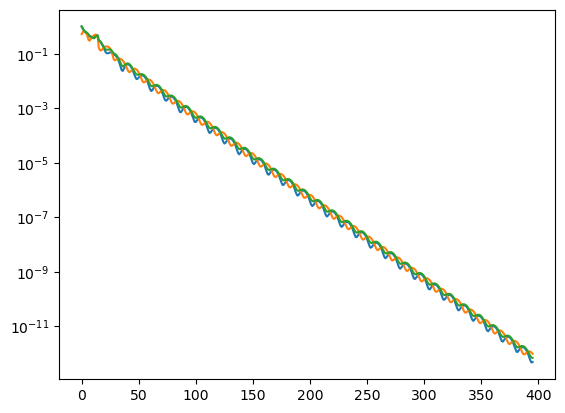

In [9]:
plt.semilogy(convergence_history_Medium)

Text(0, 0.5, 'Pressure (kPa)')

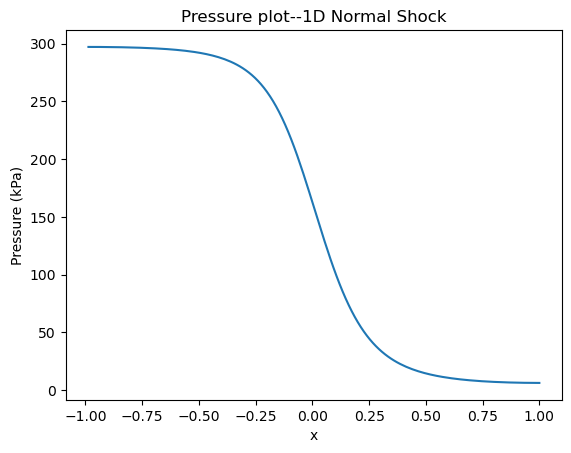

In [10]:
#plt.plot(p_compute_Medium,"-")
plt.plot(MEDIUM_ISENTROPIC.x[1:],p_compute_Medium[1:-1],"-")
plt.title("Pressure plot--1D Normal Shock")
plt.xlabel(r"x")
plt.ylabel("Pressure (kPa)")

In [7]:
zsdf

NameError: name 'zsdf' is not defined

In [ ]:
# Initialize MEDIUM ISENTROPIC CASE
MEDIUM_ISENTROPIC = Nozzle("inputs/Medium_inputs.nml")
MEDIUM_ISENTROPIC.CFL = .03
# RUN MEDIUM SIMULATION
p_compute_Medium,u_compute_Medium,rho_compute_Medium,p_exact_Medium,\
    u_exact_Medium,rho_exact_Medium,convergence_history_Medium = MEDIUM_ISENTROPIC.RUN_SIMULATION(verbose = True,convergence_criteria=tolerance,jameson_damping = False,iter_max=100000,first_order=False)

In [ ]:
temp = (MEDIUM_ISENTROPIC.NI-1)//2
plt.plot(MEDIUM_ISENTROPIC.x[temp-2:temp+3],rho_compute_Medium[temp-2:temp+3],"-o")
plt.title("Pressure plot--1D Isentropic nozzle")
plt.xlabel(r"x")
plt.ylabel("Pressure (kPa)")

In [ ]:
plt.plot(MEDIUM_ISENTROPIC.x[1:],np.sqrt(p_compute_Medium[1:-1]/rho_compute_Medium[1:-1]))
plt.title("Pressure plot--1D Isentropic nozzle")
plt.xlabel(r"x")
plt.ylabel("Pressure (kPa)")

In [ ]:
convergence_history_Medium

In [ ]:
plt.semilogy(convergence_history_Medium)

# Add labels and title
plt.xlabel('Iterations (100x)')
plt.ylabel('Error (log scale)')
plt.title('Convergence History (Isentropic)')

# Add legend
plt.legend(["Density", "Velocity", "Pressure"])

# Add grid for better readability
plt.grid(True, which="both", linestyle="--", linewidth=0.7)

In [ ]:
# Initialize MEDIUM NON-ISENTROPIC CASE
MEDIUM_NON_ISENTROPIC = Nozzle("inputs/Medium_inputs.nml")

# Manually change back pressure
MEDIUM_NON_ISENTROPIC.p_back = 120 #kPa

# RUN MEDIUM SIMULATION
p_compute_Medium,u_compute_Medium,rho_compute_Medium,p_exact_Medium,\
    u_exact_Medium,rho_exact_Medium,convergence_history_Medium = MEDIUM_NON_ISENTROPIC.RUN_SIMULATION(verbose = True,convergence_criteria=tolerance)

In [ ]:
plt.plot(MEDIUM_NON_ISENTROPIC.x[1:],p_compute_Medium[1:-1])
plt.title("Pressure plot--1D nozzle with shocks")
plt.xlabel(r"x")
plt.ylabel("Pressure (kPa)")

In [ ]:
plt.semilogy(convergence_history_Medium)

# Add labels and title
plt.xlabel('Iterations (100x)')
plt.ylabel('Error (log scale)')
plt.title('Convergence History (Non-Isentropic)')

# Add legend
plt.legend(["Density", "Velocity", "Pressure"])

# Add grid for better readability
plt.grid(True, which="both", linestyle="--", linewidth=0.7)

In [ ]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

def poisson_2d(n):
    h = 1 / (n + 1)  # Grid spacing
    N = n * n  # Total unknowns

    # Discrete Laplacian operator (5-point stencil)
    main_diag = 4 * np.ones(N)
    off_diag = -1 * np.ones(N - 1)
    off_diag[np.arange(1, N) % n == 0] = 0  # Fix for boundaries
    far_off_diag = -1 * np.ones(N - n)

    A = sp.diags([main_diag, off_diag, off_diag, far_off_diag, far_off_diag], 
                 [0, -1, 1, -n, n], shape=(N, N), format="csr")

    # Right-hand side (forcing term, f)
    x = np.linspace(h, 1 - h, n)
    y = np.linspace(h, 1 - h, n)
    X, Y = np.meshgrid(x, y, indexing="ij")
    F = np.sin(np.pi * X) * np.sin(np.pi * Y)  # Example forcing function
    b = (h ** 2) * F.ravel()  # Flatten to 1D

    # Solve the linear system
    u = spla.spsolve(A, b)

    # Reshape solution back to (n, n)
    return u.reshape((n, n))

# Example: Solve for a 10x10 grid
solution = poisson_2d(100)
plt.imshow(solution)